In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
price = pd.read_csv('prices.csv')
price.head()

,date,symbol,open,close,low,high,volume
0,1/02/2013,ZTS,31.50,31.010000,30.469999,31.74,66789100
1,4/02/2013,ZTS,31.09,31.020000,30.760000,31.99,7695400
2,5/02/2013,ZTS,31.25,31.040001,30.850000,31.98,5013200
3,6/02/2013,ZTS,30.98,31.030001,30.750000,31.43,2126100
4,7/02/2013,ZTS,31.00,32.000000,31.000000,32.73,3800800


In [3]:
#price['date'] = pd.to_datetime(price['date'])
#price.dtypes

In [4]:
company = price[price['symbol']=='MSFT']
company.head()

,date,symbol,open,close,low,high,volume
313401,4/01/2010,MSFT,30.620001,30.950001,30.590000,31.100000,38409100
313402,5/01/2010,MSFT,30.850000,30.959999,30.639999,31.100000,49749600
313403,6/01/2010,MSFT,30.879999,30.770000,30.520000,31.080000,58182400
313404,7/01/2010,MSFT,30.629999,30.450001,30.190001,30.700001,50559700
313405,8/01/2010,MSFT,30.280001,30.660000,30.240000,30.879999,51197400


In [5]:
companyStock = company.close.values.astype('float32')
companyStock = companyStock.reshape(len(companyStock), 1)
companyStock

array([[ 30.95000076],
       [ 30.95999908],
       [ 30.77000046],
       ..., 
       [ 62.99000168],
       [ 62.90000153],
       [ 62.13999939]], dtype=float32)

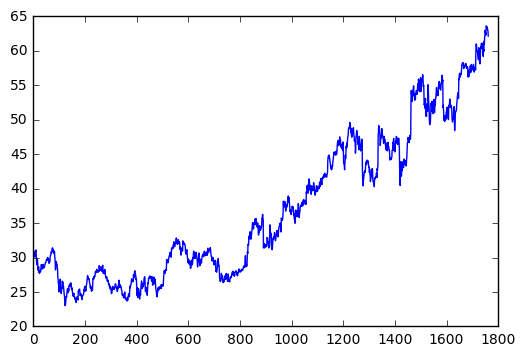

In [6]:
plt.plot(companyStock)
plt.show()

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
companyStock = scaler.fit_transform(companyStock)

In [8]:
train_size = int(len(companyStock) * 0.7)
test_size = len(companyStock) - train_size
train, test = companyStock[0:train_size,:], companyStock[train_size:len(companyStock),:]
print(len(train), len(test))

1233 529


In [9]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [10]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [11]:
# Create linear regression object
# Train the model using the training sets
regr = linear_model.LinearRegression()
regr.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# The coefficients
print('Coefficients:',regr.coef_)

Coefficients: [ 1.00052822]


In [13]:
# The mean squared error
print("Mean squared error: %.8f" % np.mean((regr.predict(testX)-testY)**2))

Mean squared error: 0.00037611


In [14]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.8f' %regr.score(testX, testY))

Variance score: 0.98157412


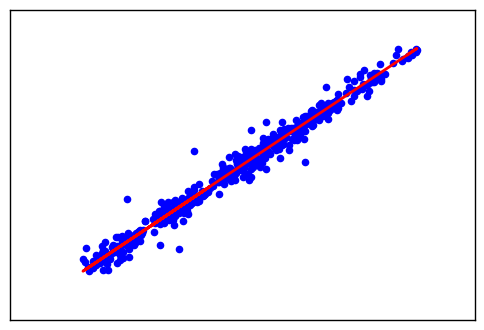

In [15]:
plt.scatter(testX, testY,  color='blue')
plt.plot(testX, regr.predict(testX), color='red',linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

In [18]:
companyOpen = company.open.values.astype('float32')
companyOpen = companyOpen.reshape(len(companyOpen), 1)
companyOpen

array([[ 30.62000084],
       [ 30.85000038],
       [ 30.87999916],
       ..., 
       [ 63.40000153],
       [ 62.86000061],
       [ 62.95999908]], dtype=float32)

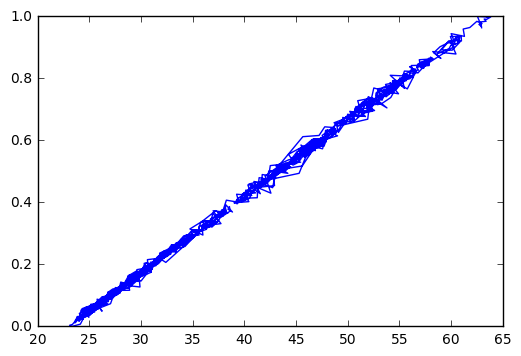

In [19]:
plt.plot(companyOpen,companyStock)
plt.show()

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
companyStock = scaler.fit_transform(companyStock)
companyOpen = scaler.fit_transform(companyOpen)

In [23]:
# Split the data into training/testing sets
X_train = companyOpen[:-20]
X_test = companyOpen[-20:]

# Split the targets into training/testing sets
y_train = companyStock[:-20]
y_test = companyStock[-20:]

In [25]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.8f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.8f' % regr.score(X_test, y_test))


Coefficients: 
 [[ 1.00398254]]
Mean squared error: 0.00018383
Variance score: 0.80782925


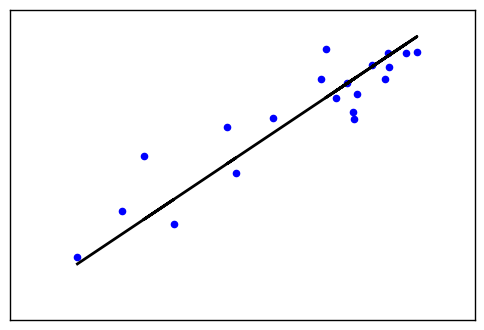

In [28]:
# Plot outputs
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regr.predict(X_test), color='black',linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()